In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import files
uploaded = files.upload()

Saving post-operative.data to post-operative.data


In [4]:
import pandas as pd
import io

dataframe = pd.read_csv(io.StringIO(uploaded['post-operative.data'].decode('utf-8')), names=["L-CORE", "L-SURF", "L-O2", "L-BP", "SURF-STBL", "CORE-STBL", "BP-STBL", "COMFORT", "ADM-DECS"])
dataframe

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A
...,...,...,...,...,...,...,...,...,...
85,mid,mid,excellent,mid,unstable,stable,stable,10,A
86,mid,mid,excellent,mid,unstable,stable,stable,15,S
87,mid,mid,good,mid,unstable,stable,stable,15,A
88,mid,mid,excellent,mid,unstable,stable,stable,10,A


In [ ]:
**1) Mô tả dữ liệu, vẽ đồ thị về dữ liệu?**
  *1.1) Mô tả dữ liệu:
    - L-CORE (nhiệt độ bên trong cơ thể của bệnh nhân tính bằng C):
      high (> 37), mid (>= 36 and <= 37), low (< 36)
    - L-SURF (nhiệt độ bề mặt da của bệnh nhân tính bằng C):
      high (> 36.5), mid (>= 36.5 and <= 35), low (< 35)
    - L-O2 (độ bão hòa oxy theo%):
      excellent (>= 98), good (>= 90 and < 98), fair (>= 80 and < 90), poor (< 80)
    - L-BP (lần đo huyết áp cuối cùng):
      high (> 130/90), mid (<= 130/90 and >= 90/70), low (< 90/70)
    - SURF-STBL (ổn định nhiệt độ bề mặt của bệnh nhân):
       stable, mod-stable, unstable
    - CORE-STBL (ổn định thân nhiệt của bệnh nhân):
       stable, mod-stable, unstable
    - BP-STBL (ổn định huyết áp của bệnh nhân):
      stable, mod-stable, unstable
    - COMFORT(cảm giác thoải mái của bệnh nhân khi xuất viện, được đo bằng một số nguyên từ 0 đến 20)
    - quyết định ADM-DECS (quyết định xuất viện):
      I (bệnh nhân được đưa đến Đơn vị Chăm sóc Đặc biệt),
      S (bệnh nhân chuẩn bị về nhà),
      A (bệnh nhân được đưa đến bệnh viện đa khoa sàn)

In [ ]:
  *1.2)Vẽ đồ thị dữ liệu

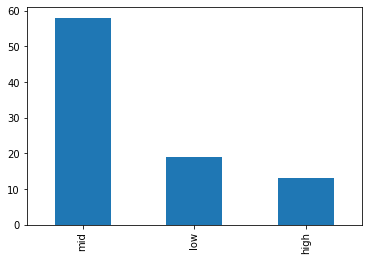

In [ ]:
dataframe['L-CORE'].value_counts().plot(kind='bar')

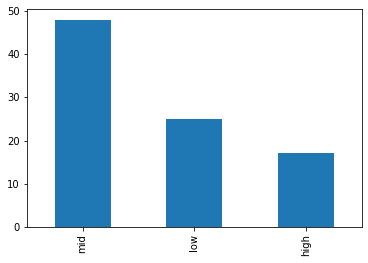

In [ ]:
dataframe['L-SURF'].value_counts().plot(kind='bar')

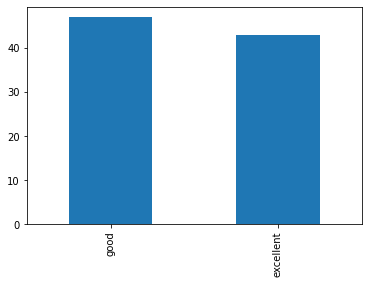

In [ ]:
dataframe['L-O2'].value_counts().plot(kind='bar')

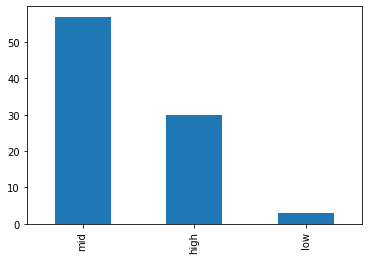

In [ ]:
dataframe['L-BP'].value_counts().plot(kind='bar')

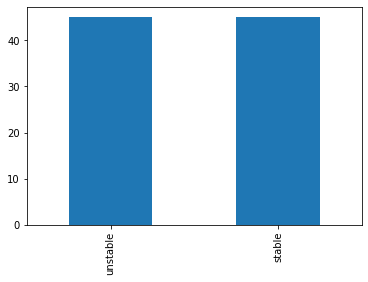

In [ ]:
dataframe['SURF-STBL'].value_counts().plot(kind='bar')

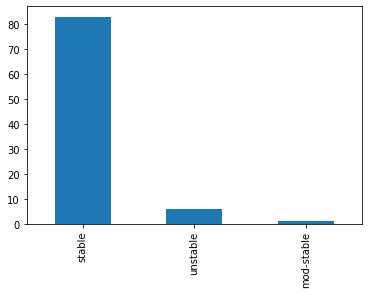

In [ ]:
dataframe['CORE-STBL'].value_counts().plot(kind='bar')

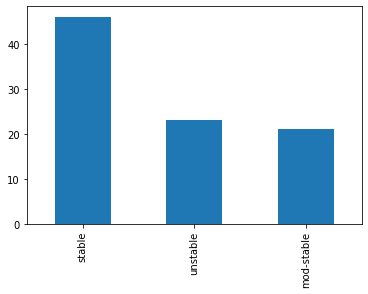

In [ ]:
dataframe['BP-STBL'].value_counts().plot(kind='bar')

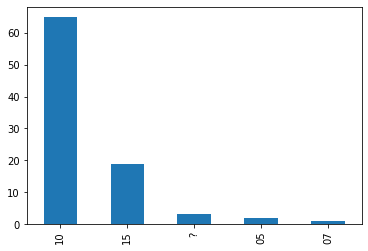

In [ ]:
dataframe['COMFORT'].value_counts().plot(kind='bar')

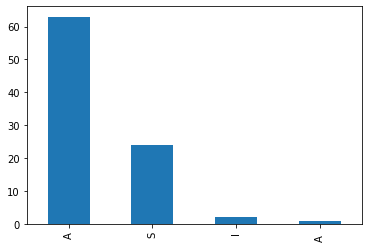

In [ ]:
dataframe['ADM-DECS'].value_counts().plot(kind='bar')

In [ ]:
2) Chuẩn hoá dữ liệu trước khi đưa vào mô hình, xử lý missing data nếu có

In [ ]:
  2.1) Xử lí missing data

In [ ]:
countLcore=0
for i in dataframe['L-CORE']:
  if i == '?':
    countLcore = countLcore + 1
print ('Count of "?" in L-CORE: ' + str(countLcore))

countLsurf=0
for i in dataframe['L-SURF']:
  if i == '?':
    countLsurf = countLcore + 1
print ('Count of "?" in L-SURF: ' + str(countLsurf))

countLo2=0
for i in dataframe['L-O2']:
  if i == '?':
    countLo2 = countLo2 + 1
print ('Count of "?" in L-O2: ' + str(countLo2))

countLbp=0
for i in dataframe['L-BP']:
  if i == '?':
    countLbp = countLbp + 1
print ('Count of "?" in L-BP: ' + str(countLbp))

countSurfStbl=0
for i in dataframe['SURF-STBL']:
  if i == '?':
    countSurfStbl = countSurfStbl + 1
print ('Count of "?" in SURF-STBL: ' + str(countSurfStbl))

countCoreStbl=0
for i in dataframe['CORE-STBL']:
  if i == '?':
    countCoreStbl = countCoreStbl + 1
print ('Count of "?" in CORE-STBL: ' + str(countCoreStbl))


countBpStbl=0
for i in dataframe['BP-STBL']:
  if i == '?':
    countBpStbl = countBpStbl + 1
print ('Count of "?" in BP-STBL: ' + str(countBpStbl))

countComfort=0
for i in dataframe['COMFORT']:
  if i == '?':
    countComfort = countComfort + 1
print ('Count of "?" in COMFORT: ' + str(countComfort))

countAdmDecs=0
for i in dataframe['ADM-DECS']:
  if i == '?':
    countAdmDecs = countAdmDecs + 1
print ('Count of "?" in ADM-DECS: ' + str(countAdmDecs))

Count of "?" in L-CORE: 0
Count of "?" in L-SURF: 0
Count of "?" in L-O2: 0
Count of "?" in L-BP: 0
Count of "?" in SURF-STBL: 0
Count of "?" in CORE-STBL: 0
Count of "?" in BP-STBL: 0
Count of "?" in COMFORT: 3
Count of "?" in ADM-DECS: 0


In [ ]:
index=0
print('Các dòng bị missing data: ')
for row in dataframe.itertuples():
  for column in row:
    if column=='?':
      print(index)
  index = index+1

Các dòng bị missing data: 
46
48
70


In [ ]:
dataframe.iloc[[46]]

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
46,low,mid,good,high,unstable,stable,stable,?,I


In [ ]:
dataframe.iloc[[48]]

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
48,high,high,excellent,high,stable,stable,unstable,?,A


In [ ]:
dataframe.iloc[[70]]

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
70,mid,low,excellent,mid,unstable,unstable,unstable,?,A


In [5]:
dataframe1=dataframe
dataframe1

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A
...,...,...,...,...,...,...,...,...,...
85,mid,mid,excellent,mid,unstable,stable,stable,10,A
86,mid,mid,excellent,mid,unstable,stable,stable,15,S
87,mid,mid,good,mid,unstable,stable,stable,15,A
88,mid,mid,excellent,mid,unstable,stable,stable,10,A


In [6]:
# dataframe1.drop(dataframe1.index[46])
dataframe1=dataframe1.drop(labels=[46,48,70], axis=0)
dataframe1


,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A
...,...,...,...,...,...,...,...,...,...
85,mid,mid,excellent,mid,unstable,stable,stable,10,A
86,mid,mid,excellent,mid,unstable,stable,stable,15,S
87,mid,mid,good,mid,unstable,stable,stable,15,A
88,mid,mid,excellent,mid,unstable,stable,stable,10,A


In [ ]:
  2.2) Chuẩn hóa dữ liệu
    

In [7]:
X = dataframe1.values[:,:-1]
y = dataframe1.values[:,-1]
print(X)
print(y)

[['mid' 'low' 'excellent' 'mid' 'stable' 'stable' 'stable' '15']
 ['mid' 'high' 'excellent' 'high' 'stable' 'stable' 'stable' '10']
 ['high' 'low' 'excellent' 'high' 'stable' 'stable' 'mod-stable' '10']
 ['mid' 'low' 'good' 'high' 'stable' 'unstable' 'mod-stable' '15']
 ['mid' 'mid' 'excellent' 'high' 'stable' 'stable' 'stable' '10']
 ['high' 'low' 'good' 'mid' 'stable' 'stable' 'unstable' '15']
 ['mid' 'low' 'excellent' 'high' 'stable' 'stable' 'mod-stable' '05']
 ['high' 'mid' 'excellent' 'mid' 'unstable' 'unstable' 'stable' '10']
 ['mid' 'high' 'good' 'mid' 'stable' 'stable' 'stable' '10']
 ['mid' 'low' 'excellent' 'mid' 'unstable' 'stable' 'mod-stable' '10']
 ['mid' 'mid' 'good' 'mid' 'stable' 'stable' 'stable' '15']
 ['mid' 'low' 'good' 'high' 'stable' 'stable' 'mod-stable' '10']
 ['high' 'high' 'excellent' 'high' 'unstable' 'stable' 'unstable' '15']
 ['mid' 'high' 'good' 'mid' 'unstable' 'stable' 'mod-stable' '10']
 ['mid' 'low' 'good' 'high' 'unstable' 'unstable' 'stable' '15']


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in range(X.shape[1]):
    X[:,i] = encoder.fit_transform(X[:,i])
print(X)

[[2 1 0 2 0 1 1 3]
 [2 0 0 0 0 1 1 2]
 [0 1 0 0 0 1 0 2]
 [2 1 1 0 0 2 0 3]
 [2 2 0 0 0 1 1 2]
 [0 1 1 2 0 1 2 3]
 [2 1 0 0 0 1 0 0]
 [0 2 0 2 1 2 1 2]
 [2 0 1 2 0 1 1 2]
 [2 1 0 2 1 1 0 2]
 [2 2 1 2 0 1 1 3]
 [2 1 1 0 0 1 0 2]
 [0 0 0 0 1 1 2 3]
 [2 0 1 2 1 1 0 2]
 [2 1 1 0 1 2 1 3]
 [0 0 0 0 1 1 2 2]
 [1 0 1 0 1 1 0 3]
 [2 1 1 0 1 1 1 2]
 [2 0 1 2 1 1 2 3]
 [2 2 1 2 0 1 1 2]
 [1 0 1 2 1 1 1 3]
 [1 2 0 0 1 1 2 2]
 [2 2 1 2 1 1 2 3]
 [2 2 1 2 1 1 1 2]
 [0 0 1 2 0 1 0 2]
 [1 2 1 2 1 1 1 2]
 [0 2 1 1 0 1 0 2]
 [1 2 0 0 0 1 0 2]
 [2 2 0 2 0 1 2 3]
 [2 2 1 2 1 1 2 2]
 [2 2 1 0 1 1 1 2]
 [1 1 1 2 1 1 2 2]
 [2 2 0 0 1 1 0 2]
 [2 1 1 2 0 1 1 2]
 [1 2 0 0 0 1 0 2]
 [2 2 1 2 0 1 1 2]
 [1 2 0 2 0 1 1 2]
 [1 1 1 2 1 1 2 2]
 [1 1 1 2 0 1 1 1]
 [2 2 1 0 1 1 0 2]
 [1 1 1 2 1 1 1 2]
 [1 2 1 2 0 1 1 3]
 [0 0 1 0 1 1 1 3]
 [2 2 1 2 0 1 1 2]
 [1 1 0 2 0 1 1 2]
 [1 2 1 2 1 1 1 2]
 [2 2 0 2 1 1 1 2]
 [2 0 1 1 1 1 1 2]
 [2 0 1 2 1 0 0 2]
 [1 0 0 2 1 1 1 2]
 [2 1 0 0 1 1 2 2]
 [2 2 1 2 1 1 0 2]
 [0 0 0 2 1 

In [ ]:
3) Xây dựng các mô hình học máy cho bài toán Classification hoặc Regression, thử nghiệm các mô hình sau: kNN, NB, SVM


In [ ]:
  3.1)KNN

In [9]:
yKnn=y.ravel()
print(y.shape)
print(y[:10])

(87,)
['A' 'S' 'A' 'A ' 'A' 'S' 'S' 'S' 'S' 'S']


In [10]:
from sklearn.model_selection import train_test_split
X_train_Knn, X_test_Knn, y_train_Knn, y_test_Knn = train_test_split(\
    X, y, test_size=0.3, random_state=42)

print('Train:')
print(X_train_Knn.shape)
print(y_train_Knn.shape)
print('Test:')
print(X_test_Knn.shape)
print(y_test_Knn.shape)

Train:
(60, 8)
(60,)
Test:
(27, 8)
(27,)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
modelKnn = KNeighborsClassifier(n_neighbors=3)
# training process
modelKnn.fit(X_train_Knn, y_train_Knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [12]:
y_pred_Knn = modelKnn.predict(X_test_Knn)

In [13]:
# in kết quả để so sánh
for i in range(len(y_test_Knn)):
    print(y_test_Knn[i],y_pred_Knn[i])

A A
A A
A A
A S
A A
A A
A A
A A
A A
A A
A S
A A
A S
A S
S A
A A
A A
I A
A A
A S
A A
A A
A A
A A
S A
A A
S A


In [ ]:
  3.2)NB

In [14]:
X_train_Nb = X[:15,:]
y_train_Nb = y[:15]
X_test_Nb = X[15:,:]
y_test_Nb = y[15:]

In [15]:
from sklearn.naive_bayes import MultinomialNB
model_MulNB = MultinomialNB()
model_MulNB.fit(X_train_Nb,y_train_Nb)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
y_pred_MulNb = model_MulNB.predict(X_test_Nb)
print(y_pred_MulNb)
print(y_test_Nb)

['S' 'A' 'A' 'S' 'A' 'S' 'A' 'S' 'S' 'S' 'S' 'A' 'A' 'A' 'S' 'A' 'S' 'A'
 'S' 'A' 'A' 'A' 'S' 'S' 'A' 'S' 'A' 'A' 'A' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'A' 'A' 'A' 'A' 'S' 'S' 'A' 'S' 'S' 'S' 'A' 'S' 'S' 'A' 'A' 'S'
 'A' 'A' 'A' 'S' 'A' 'S' 'S' 'A' 'A' 'A' 'S' 'S' 'S' 'S' 'A' 'A' 'S' 'A']
['A' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A' 'A'
 'A' 'A' 'A' 'S' 'S' 'S' 'A' 'A' 'S' 'S' 'S' 'A' 'S' 'A' 'A' 'A' 'A' 'A'
 'S' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'S' 'A' 'A' 'A' 'A' 'A'
 'S' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A' 'S' 'I' 'A' 'A' 'A' 'S' 'A' 'A' 'S']


In [17]:
from sklearn.naive_bayes import GaussianNB
model_GauNB = GaussianNB()
model_GauNB.fit(X_train_Nb,y_train_Nb)

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
y_pred_GauNB = model_GauNB.predict(X_test_Nb)
print(y_pred_GauNB)
print(y_test_Nb)

['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']
['A' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A' 'A'
 'A' 'A' 'A' 'S' 'S' 'S' 'A' 'A' 'S' 'S' 'S' 'A' 'S' 'A' 'A' 'A' 'A' 'A'
 'S' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'S' 'A' 'A' 'A' 'A' 'A'
 'S' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A' 'S' 'I' 'A' 'A' 'A' 'S' 'A' 'A' 'S']


In [19]:
from sklearn.naive_bayes import BernoulliNB
model_BerNB = BernoulliNB()
model_BerNB.fit(X_train_Nb,y_train_Nb)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [20]:
y_pred_BerNB = model_BerNB.predict(X_test_Nb)
print(y_pred_BerNB)
print(y_test_Nb)

['S' 'A' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'A' 'S' 'A' 'A' 'S' 'S' 'S' 'S' 'A'
 'S' 'A' 'S' 'S' 'S' 'S' 'A' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'A' 'A' 'A' 'A' 'S' 'A' 'S' 'S' 'S' 'A' 'S' 'S' 'A' 'S' 'S'
 'A' 'A' 'A' 'S' 'A' 'S' 'S' 'A' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S']
['A' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A' 'A'
 'A' 'A' 'A' 'S' 'S' 'S' 'A' 'A' 'S' 'S' 'S' 'A' 'S' 'A' 'A' 'A' 'A' 'A'
 'S' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'S' 'A' 'A' 'A' 'A' 'A'
 'S' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A' 'S' 'I' 'A' 'A' 'A' 'S' 'A' 'A' 'S']


In [ ]:
  3.3)SVM

In [21]:
ySvm=y.ravel()
print(ySvm.shape)
print(ySvm[:10])

(87,)
['A' 'S' 'A' 'A ' 'A' 'S' 'S' 'S' 'S' 'S']


In [22]:
from sklearn.model_selection import train_test_split
X_train_Svm, X_test_Svm, y_train_Svm, y_test_Svm = train_test_split(\
    X, ySvm, test_size=0.3, random_state=42)

print('Train:')
print(X_train_Svm.shape)
print(y_train_Svm.shape)
print('Test:')
print(X_test_Svm.shape)
print(y_test_Svm.shape)

Train:
(60, 8)
(60,)
Test:
(27, 8)
(27,)


In [23]:
from sklearn import svm 
model_Svm = svm.SVC(kernel='linear',gamma=0.01, C=100.)
model_Svm.fit(X_train_Svm,y_train_Svm)

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
y_pred_Svm = model_Svm.predict(X_test_Svm)

In [25]:
for i in range(len(y_test_Svm)):
    print(y_test_Svm[i],y_pred_Svm[i])

A A
A A
A A
A A
A A
A A
A A
A A
A A
A A
A A
A A
A A
A A
S A
A A
A A
I A
A A
A A
A A
A A
A A
A A
S A
A A
S A


In [ ]:
4) Tự bổ sung thêm 1 mô hình nào tự tìm hiểu (Decision Tree, Neural Networks, …)

In [ ]:
DecisionTree

In [26]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(110.5828125, 209.07692307692307, 'X[5] <= 1.5\ngini = 0.432\nsamples = 87\nvalue = [61, 1, 1, 24]'),
 Text(57.253125000000004, 192.35076923076923, 'X[7] <= 1.5\ngini = 0.399\nsamples = 82\nvalue = [60, 0, 1, 21]'),
 Text(18.6, 175.62461538461537, 'X[4] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 0, 0, 2]'),
 Text(9.3, 158.89846153846153, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]'),
 Text(27.900000000000002, 158.89846153846153, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]'),
 Text(95.90625000000001, 175.62461538461537, 'X[3] <= 1.5\ngini = 0.384\nsamples = 79\nvalue = [59, 0, 1, 19]'),
 Text(46.5, 158.89846153846153, 'X[6] <= 0.5\ngini = 0.245\nsamples = 28\nvalue = [24, 0, 0, 4]'),
 Text(37.2, 142.1723076923077, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0, 0]'),
 Text(55.800000000000004, 142.1723076923077, 'X[1] <= 0.5\ngini = 0.346\nsamples = 18\nvalue = [14, 0, 0, 4]'),
 Text(37.2, 125.44615384615385, 'X[6] <= 1.5\ngini = 0.48\nsamples = 5\nvalue = [3, 0, 0, 2]'),
 T

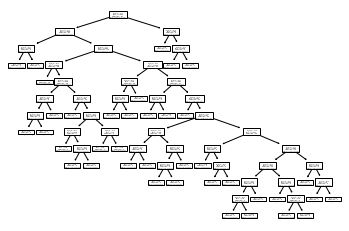

In [27]:
tree.plot_tree(clf) 

In [ ]:
5) (1 điểm) Đánh giá độ chính xác qua các độ đo precision, recall, F-score,accuracy

In [ ]:
5.1) Đánh giá độ chính xác KNN

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test_Knn,y_pred_Knn))

              precision    recall  f1-score   support

           A       0.82      0.78      0.80        23
           I       0.00      0.00      0.00         1
           S       0.00      0.00      0.00         3

    accuracy                           0.67        27
   macro avg       0.27      0.26      0.27        27
weighted avg       0.70      0.67      0.68        27



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
5.1) Đánh giá độ chính xác NB

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_MulNb,y_test_Nb))

              precision    recall  f1-score   support

           A       0.44      0.71      0.55        34
           I       0.00      0.00      0.00         0
           S       0.41      0.18      0.25        38

    accuracy                           0.43        72
   macro avg       0.29      0.30      0.27        72
weighted avg       0.43      0.43      0.39        72



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_GauNB,y_test_Nb))

              precision    recall  f1-score   support

           A       0.96      0.75      0.85        69
           I       0.00      0.00      0.00         0
           S       0.06      0.33      0.10         3

    accuracy                           0.74        72
   macro avg       0.34      0.36      0.32        72
weighted avg       0.93      0.74      0.81        72



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_BerNB,y_test_Nb))

              precision    recall  f1-score   support

           A       0.31      0.89      0.47        19
           I       0.00      0.00      0.00         0
           S       0.88      0.28      0.43        53

    accuracy                           0.44        72
   macro avg       0.40      0.39      0.30        72
weighted avg       0.73      0.44      0.44        72



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
5.2) Đánh giá độ chính xác Svm

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test_Svm,y_pred_Svm))

              precision    recall  f1-score   support

           A       0.85      1.00      0.92        23
           I       0.00      0.00      0.00         1
           S       0.00      0.00      0.00         3

    accuracy                           0.85        27
   macro avg       0.28      0.33      0.31        27
weighted avg       0.73      0.85      0.78        27



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
6) (2 điểm) Tìm hiểu về vấn đề Overfiting và trong chương trình trên đã áp dụng như thế nào? (phần này cần trình bày bằng slide)

_1, train: 0.950, test: 0.667
_2, train: 0.667, test: 0.778
_3, train: 0.717, test: 0.667
_4, train: 0.633, test: 0.852
_5, train: 0.683, test: 0.667
_6, train: 0.650, test: 0.778
_7, train: 0.633, test: 0.667
_8, train: 0.617, test: 0.815
_9, train: 0.650, test: 0.704
_10, train: 0.633, test: 0.815
_11, train: 0.583, test: 0.815
_12, train: 0.633, test: 0.815
_13, train: 0.650, test: 0.852
_14, train: 0.633, test: 0.815
_15, train: 0.633, test: 0.815
_16, train: 0.633, test: 0.852
_17, train: 0.650, test: 0.889
_18, train: 0.633, test: 0.852
_19, train: 0.650, test: 0.852
_20, train: 0.633, test: 0.852
_21, train: 0.683, test: 0.815
_22, train: 0.633, test: 0.852
_23, train: 0.633, test: 0.852
_24, train: 0.633, test: 0.852
_25, train: 0.633, test: 0.852
_26, train: 0.633, test: 0.852
_27, train: 0.617, test: 0.815
_28, train: 0.617, test: 0.852
_29, train: 0.617, test: 0.815
_30, train: 0.633, test: 0.852
_31, train: 0.633, test: 0.852
_32, train: 0.633, test: 0.852
_33, train: 0.633

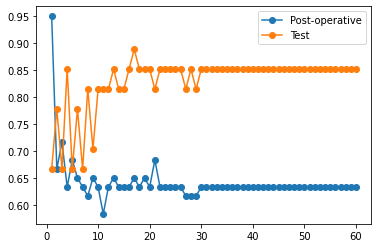

In [37]:
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# xác định danh sách để thu thập dữ liệu
train_scores, test_scores = list(), list()
values = [i for i in range(1, 61)]
# Chạy thay đổi láng giềng
for i in values:
 modelKnn = KNeighborsClassifier(n_neighbors=i)
 modelKnn.fit(X_train_Knn, y_train_Knn)
 # đánh giá trên tệp post operative
 train_yhat = modelKnn.predict(X_train_Knn)
 train_acc = accuracy_score(y_train_Knn, train_yhat)
 train_scores.append(train_acc)
 # đánh giá trên tệp dữ liệu test
 test_yhat = modelKnn.predict(X_test_Knn)
 test_acc = accuracy_score(y_test_Knn, test_yhat)
 test_scores.append(test_acc)
 # Tóm tắt
 print('_%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# Hình minh họa
pyplot.plot(values, train_scores, '-o', label='Post-operative')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()